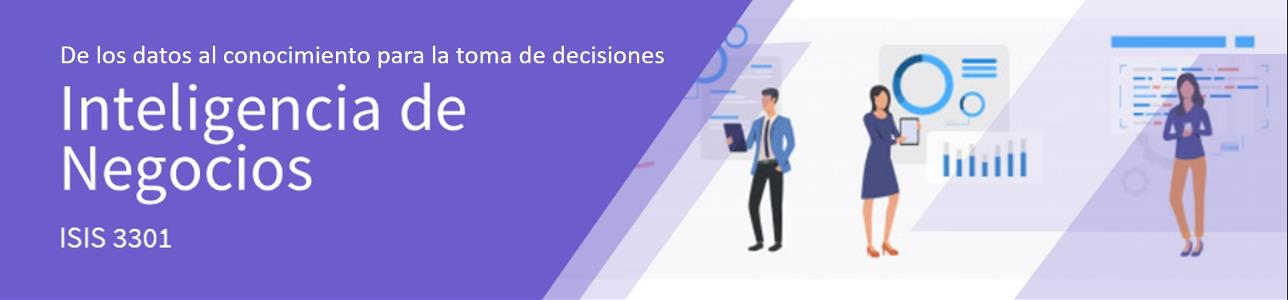

## PROYECTO ETAPA 1 BI
*   Luimarco Carrascal
*   Isabel Carrascal


## Problema
<p style="text-align: justify;"> La Organización de las Naciones Unidas (ONU) adopta, el 25 de septiembre del año 2015, la
Agenda 2030i para el desarrollo sostenible, cuyo fin es reducir la pobreza, garantizar acceso
a la salud y educación, buscar igualdad de género y oportunidades, disminuir el impacto
ambiental, entre otros. Esta agenda se basa en 17 objetivos de desarrollo sostenibleii (ODS)
y 169 metas (derivadas de los diferentes ODS).
Dentro del trabajo en conjunto de diferentes entes para alcanzar el cumplimiento de los
ODS, muchas entidades tienen como enfoque el seguimiento y la evaluación de las políticas
públicas y su impacto a nivel social. Este es el caso del Fondo de Poblaciones de las Naciones
Unidas (UNFPAiii) que, junto con entidades públicas y haciendo uso de diferentes
herramientas de participación ciudadana, busca identificar problemas y evaluar soluciones
actuales, relacionando la información con los diferentes ODS. En este contexto, uno de los
procesos que requiere de un mayor esfuerzo es la clasificación de la información textual
que es recopilada, ya que es una tarea que consume gran cantidad recursos y para la cual
se requiere un experto. Es por esto que, en los últimos años, UNFPA ha venido trabajando,
en conjunto con la Universidad de los Andes, en la implementación de diferentes estrategias
de clasificación de textos, que les permitan hacer un análisis automatizado de opiniones
que representan la voz de los habitantes locales sobre problemáticas de su entorno
particular.
Para apoyar a UNFPA en este proceso se ha planteado el primer proyecto del curso, cuyo
objetivo es desarrollar un modelo de clasificación, con técnicas de aprendizaje
automático, que permita relacionar de manera automática un texto según los ODS. Al
igual que desarrollar una aplicación que facilite la interacción con el resultado de dicho
modelo. El modelo podrá ser utilizado entonces para la interpretación y análisis de la
información textual que es recopilada a través de diferentes fuentes por UNFPA en procesos
de planeación participativa para el desarrollo a nivel territorial.

### 1. Instalación e importanción de librerías.


In [ ]:
!pip install contractions
!pip install --upgrade pip
!pip install ydata-profiling

!pip install num2words
!pip install gensim



In [ ]:
!python -m spacy download es_core_news_sm

2023-10-30 01:03:51.434404: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-30 01:03:51.434457: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-30 01:03:51.434489: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-30 01:03:52.733671: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 29.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
!pip install --upgrade typeguard typing-extensions


In [ ]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
#from ydata_profiling import ProfileReport

import gensim
from gensim.models import Word2Vec
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

In [ ]:
 # librería para manejar las flexiones gramaticales en el idioma inglés.
!pip install inflect


In [ ]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
#from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt


### 2. Perfilamiento y entendimiento de los datos



#### Lectura de los datos.

In [ ]:
# Monta Google Drive en el entorno de Colab
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Datos etiquetados

In [ ]:
# Ruta del archivo CSV específico
file_path = '/content/drive/MyDrive/ProyectoBI/Data/cat_6716.csv'

# Leer el archivo CSV
df_textos = pd.read_csv(file_path, delimiter=',')



In [ ]:
df_textos.shape

(3000, 2)

In [ ]:
df_textos.head

<bound method NDFrame.head of                                          Textos_espanol  sdg
0     Es importante destacar que, en un año de sequí...    6
1     Hay una gran cantidad de literatura sobre Aust...    6
2     Los procesos de descentralización, emprendidos...    6
3     Esto puede tener consecuencias sustanciales pa...    6
4     La función de beneficio también incorpora pará...    6
...                                                 ...  ...
2995  "Forjando una Convención para los Crímenes con...   16
2996  En 2016, Daragh Murray publicó su libro Obliga...   16
2997  En este libro, el autor argumenta que el activ...   16
2998  * Facultad de Derecho, Universidad de Manchest...   16
2999  Este caso 1 constituye el primer pronunciamien...   16

[3000 rows x 2 columns]>

### Datos sin etiquetas

In [ ]:
# Ruta del archivo CSV específico
file_path = '/content/drive/MyDrive/ProyectoBI/Data/SinEtiquetatest_cat_6716.csv'

# Leer el archivo CSV
df_sinEtiqueta = pd.read_csv(file_path, delimiter=',')


In [ ]:
df_sinEtiqueta.shape

(980, 2)

In [ ]:
df_sinEtiqueta.head

<bound method NDFrame.head of                                         Textos_espanol  sdg
0    1. 1. Introducción: Las Estructuras del Derech...  NaN
1    Las aguas subterráneas se han debatido en el c...  NaN
2    La presente contribución evalúa la jurispruden...  NaN
3    Sin embargo, este crédito fiscal expira en 201...  NaN
4    Este estudio explora las actitudes, comportami...  NaN
..                                                 ...  ...
975  Este artículo explora la historia y el impacto...  NaN
976  Mientras que algunos dan mayor énfasis a la ma...  NaN
977  Una innovación importante para garantizar el s...  NaN
978  El Salvador continúa luchando con niveles elev...  NaN
979  También puede reflejar una baja conciencia sob...  NaN

[980 rows x 2 columns]>

#### Entendimiento de los Datos

Para entender los mensajes, se realizan 'estadísticas descriptivas' para poder obtener un análisis de los textos.

In [ ]:
textos = df_textos.copy()
print(textos)
textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
textos['Moda'] = [max(set(x.split(' ')), key = x.split(' ').count) for x in textos['Textos_espanol']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]

# Se realiza un perfilamiento de los datos con la libre pandas profiling
#ProfileReport(textos)

                                         Textos_espanol  sdg
0     Es importante destacar que, en un año de sequí...    6
1     Hay una gran cantidad de literatura sobre Aust...    6
2     Los procesos de descentralización, emprendidos...    6
3     Esto puede tener consecuencias sustanciales pa...    6
4     La función de beneficio también incorpora pará...    6
...                                                 ...  ...
2995  "Forjando una Convención para los Crímenes con...   16
2996  En 2016, Daragh Murray publicó su libro Obliga...   16
2997  En este libro, el autor argumenta que el activ...   16
2998  * Facultad de Derecho, Universidad de Manchest...   16
2999  Este caso 1 constituye el primer pronunciamien...   16

[3000 rows x 2 columns]


### 3. Preparación de datos

Para poder realizar el pre-procesamiento de los datos, es recomendable pasar por tres etapas:
* Limpieza de los datos.
* Tokenización.
* Normalización.

Para mayor información, pueden consultar el [siguiente artículo](https://medium.com/datos-y-ciencia/preprocesamiento-de-datos-de-texto-un-tutorial-en-python-5db5620f1767
).

#### **3.1 Limpieza de los datos**


**Pipeline**



In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import nltk



# Crear una copia del DataFrame originaletiquetas y sin etiquetas
textos_df = textos.copy()
df_sinEtiquetaT= df_sinEtiqueta.copy()

def limpiar_y_tokenizar(texto):
    texto = BeautifulSoup(texto, "lxml").text  # Eliminar etiquetas HTML/XML
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar caracteres especiales
    texto = texto.lower()  # Convertir a minúsculas
    tokens = nltk.word_tokenize(texto)  # Tokenización
    stop_words = set(nltk.corpus.stopwords.words('spanish'))  # Definir las stopwords
    tokens_filtrados = [word for word in tokens if word not in stop_words]  # Eliminar stopwords
    tokens_unicos = list(set(tokens_filtrados))  # Eliminar tokens repetidos
    texto_limpio_tokenizado = ' '.join(tokens_unicos)  # Unir los tokens en una cadena
    return texto_limpio_tokenizado


# Aplicar la función de limpieza y tokenización a cada fila de la columna de texto
textos_df['Textos_espanol'] = textos_df['Textos_espanol'].apply(limpiar_y_tokenizar)





In [ ]:
textos_df.head

<bound method NDFrame.head of                                          Textos_espanol  sdg  Conteo Moda  \
0     espera ríos hidrológicamente aportes conectado...    6     621   de   
1     circunstancias sequías climático políticos sus...    6     881   de   
2     jsc tendencia azerbaiyán proporcionado central...    6     579   la   
3     riesgo representar aportes puede aguas torre e...    6     706   de   
4     espera hidrológicos requeriría deseable año po...    6     673   de   
...                                                 ...  ...     ...  ...   
2995  hoc estatutarias ad 15 cuestiones roma corte p...   16    1056   de   
2996  intenta marco fuente aún tema discutido 2016 l...   16     942   de   
2997  estatutario aún lugar protección vulnerables a...   16     749   de   
2998  convention apelaciã³n unido state continuación...   16     993   de   
2999  justicia juzgar jurisdicción segundo incumben ...   16     618   de   

      Max  Min  
0      16    1  
1      15  

In [ ]:
#Limpieza datos sin etiquetar
df_sinEtiquetaT= df_sinEtiqueta.copy()

# Aplicar la función de limpieza y tokenización a cada fila de la columna de texto
df_sinEtiquetaT['Textos_espanol'] = df_sinEtiquetaT['Textos_espanol'].apply(limpiar_y_tokenizar)

In [ ]:
df_sinEtiquetaT.head

<bound method NDFrame.head of                                         Textos_espanol  sdg
0    instanciación seguridad razonable estructuras ...  NaN
1    2012b 2009b subsecciones 2014a 2013d primer lu...  NaN
2    justicia muestra motivos effet relativas miemb...  NaN
3    abandonar desplazamientos lugar 2012 anualment...  NaN
4    muestra marco protección 440 válidas investiga...  NaN
..                                                 ...  ...
975  puede argumenta prácticas desarrollo difícil i...  NaN
976  disponible intencionado financiación distribuc...  NaN
977  wood reino renovable etapas introdujo tgc unid...  NaN
978  acciones enfrenta seguridad perpetrada histori...  NaN
979  reflejar acuíferos puede situación hídricos ni...  NaN

[980 rows x 2 columns]>

In [ ]:
class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_cleaned = X.apply(self.clean_text)
        return X_cleaned

    def clean_text(self, text):
        text = re.sub(r'[^\w\s]', '', text)  # Eliminar caracteres especiales
        text = text.lower()  # Convertir a minúsculas
        stop_words = set(stopwords.words('spanish'))  # Definir las stopwords
        text = ' '.join(word for word in text.split() if word not in stop_words)  # Eliminar stopwords
        text = ' '.join(set(text.split()))  # Eliminar palabras repetidas
        return text



In [ ]:
pipeline = Pipeline([
    ('text_cleaner', TextCleaner()),
    ('vectorizer', CountVectorizer())
])

In [ ]:
# aplicar el pipeline
X_clean = pipeline.fit_transform(textos_df['Textos_espanol'])
print(textos_df['Textos_espanol'][0])
Y2k_result = textos_df['sdg']
#X_clean = pipeline.fit_transform(df_sinEtiquetaT['Textos_espanol'])

X2_train, X2_test, y2_train, y2_test = train_test_split(X_clean, Y2k_result, test_size=0.2, random_state=42)


esper rios hidrolog aport conect acuifer ano agu descens subterran sequi nivel provoc veget curs cultiv disponibil demand external poz destac menor b ecosistem local dependient inclu continu pued espacial bombe asi agot aument reduccion ejempl caudal freatic disminu agu import esperar rio hidrologicamente aporte conectado acuifero ano agua descenso subterranea sequia nivel provocara vegetacion curso cultivo disponibilidad demandar externalidades pozo destacar menor b ecosistema local dependiente incluir continuo poder espacial bombeo asi agotamiento aumentar reduccion ejemplo caudal freatico disminuir agua importante


In [ ]:
import joblib

# Guardar el Pipeline en un archivo
filename = 'mi_pipeline.pkl'
joblib.dump(pipeline, filename)

['mi_pipeline.pkl']

In [ ]:
from google.colab import files

files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_clean

<3000x21693 sparse matrix of type '<class 'numpy.int64'>'
	with 161751 stored elements in Compressed Sparse Row format>

In [ ]:
X_clean.shape

(3000, 21693)

In [ ]:
textos_df.head

<bound method NDFrame.head of                                          Textos_espanol  sdg  Conteo Moda  \
0     espera ríos hidrológicamente aportes conectado...    6     621   de   
1     circunstancias sequías climático políticos sus...    6     881   de   
2     jsc tendencia azerbaiyán proporcionado central...    6     579   la   
3     riesgo representar aportes puede aguas torre e...    6     706   de   
4     espera hidrológicos requeriría deseable año po...    6     673   de   
...                                                 ...  ...     ...  ...   
2995  hoc estatutarias ad 15 cuestiones roma corte p...   16    1056   de   
2996  intenta marco fuente aún tema discutido 2016 l...   16     942   de   
2997  estatutario aún lugar protección vulnerables a...   16     749   de   
2998  convention apelaciã³n unido state continuación...   16     993   de   
2999  justicia juzgar jurisdicción segundo incumben ...   16     618   de   

      Max  Min  
0      16    1  
1      15  

In [ ]:
import re
import unicodedata
from num2words import num2words

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all integer occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words(word, lang='es')  # español
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def preprocessing(text):
    words = nltk.word_tokenize(text)  # Tokenizar el texto aquí
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    return ' '.join(words)




#### **3.2 Tokenización**
La tokenización permite dividir frases u oraciones en palabras. Con el fin de desglozar las palabras correctamente para el posterior análisis. Pero primero, se realiza una corrección de las contracciones que pueden estar presentes en los textos.

In [ ]:
df_textos.head

<bound method NDFrame.head of                                          Textos_espanol  sdg
0     Es importante destacar que, en un año de sequí...    6
1     Hay una gran cantidad de literatura sobre Aust...    6
2     Los procesos de descentralización, emprendidos...    6
3     Esto puede tener consecuencias sustanciales pa...    6
4     La función de beneficio también incorpora pará...    6
...                                                 ...  ...
2995  "Forjando una Convención para los Crímenes con...   16
2996  En 2016, Daragh Murray publicó su libro Obliga...   16
2997  En este libro, el autor argumenta que el activ...   16
2998  * Facultad de Derecho, Universidad de Manchest...   16
2999  Este caso 1 constituye el primer pronunciamien...   16

[3000 rows x 2 columns]>

In [ ]:
df_textos.dtypes

Textos_espanol    object
sdg                int64
dtype: object

In [ ]:
textos_df['Textos_espanol'] = textos_df['Textos_espanol'].apply(preprocessing)  # Aplica la eliminación del ruido
textos_df.head()


,Textos_espanol,sdg,Conteo,Moda,Max,Min
0,espera rios hidrologicamente aportes conectado...,6,621,de,16,1
1,circunstancias sequias climatico politicos sus...,6,881,de,15,1
2,jsc tendencia azerbaiyan proporcionado central...,6,579,la,18,1
3,riesgo representar aportes puede aguas torre e...,6,706,de,14,1
4,espera hidrologicos requeriria deseable ano po...,6,673,de,12,1


In [ ]:
df_sinEtiquetaT['Textos_espanol'] = df_sinEtiquetaT['Textos_espanol'].apply(preprocessing)  # Aplica la eliminación del ruido
df_sinEtiquetaT.head()

,Textos_espanol,sdg
0,instanciacion seguridad razonable estructuras ...,NaN
1,2012b 2009b subsecciones 2014a 2013d primer lu...,NaN
2,justicia muestra motivos effet relativas miemb...,NaN
3,abandonar desplazamientos lugar dos mil doce a...,NaN
4,muestra marco proteccion cuatrocientos cuarent...,NaN


#### **3.3. Normalización**
En la normalización de los datos se realiza la eliminación de prefijos y sufijos, además de realizar una lemmatización.

In [ ]:
import spacy
from nltk.stem.snowball import SnowballStemmer
import pandas as pd

# Asegúrate de tener el modelo de spaCy para español descargado
nlp = spacy.load("es_core_news_sm")

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer(language='spanish')
    stems = [stemmer.stem(word) for word in words]
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    doc = nlp(" ".join(words))
    lemmas = [token.lemma_ for token in doc]
    return lemmas

def stem_and_lemmatize(text):
    words = text.split()  # Asume que el texto ya está tokenizado y separado por espacios
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return ' '.join(stems + lemmas)  # Unir stems y lemmas en una cadena


textos_df['Textos_espanol'] = textos_df['Textos_espanol'].apply(stem_and_lemmatize)  # Aplica lematización y derivación
textos_df.head()


,Textos_espanol,sdg,Conteo,Moda,Max,Min
0,esper rios hidrolog aport conect acuifer ano a...,6,621,de,16,1
1,circunst sequi climat polit sustancial escasez...,6,881,de,15,1
2,jsc tendenci azerbaiy proporcion centraliz pro...,6,579,la,18,1
3,riesg represent aport pued agu torr especial p...,6,706,de,14,1
4,esper hidrolog requeriri deseabl ano posibl ma...,6,673,de,12,1


In [ ]:


df_sinEtiquetaT['Textos_espanol'] = df_sinEtiquetaT['Textos_espanol'].apply(stem_and_lemmatize)  # Aplica lematización y derivación
df_sinEtiquetaT.head()

,Textos_espanol,sdg
0,instanci segur razon estructur estand person m...,NaN
1,2012b 2009b subseccion 2014a 2013d prim lug en...,NaN
2,justici muestr motiv effet relat miembr europ ...,NaN
3,abandon desplaz lug dos mil doc anual oportun ...,NaN
4,muestr marc proteccion cuatrocient cuarent val...,NaN


In [ ]:
textos_df.head

<bound method NDFrame.head of                                          Textos_espanol  sdg  Conteo Moda  \
0     esper rios hidrolog aport conect acuifer ano a...    6     621   de   
1     circunst sequi climat polit sustancial escasez...    6     881   de   
2     jsc tendenci azerbaiy proporcion centraliz pro...    6     579   la   
3     riesg represent aport pued agu torr especial p...    6     706   de   
4     esper hidrolog requeriri deseabl ano posibl ma...    6     673   de   
...                                                 ...  ...     ...  ...   
2995  hoc estatutari ad quinc cuestion rom cort prom...   16    1056   de   
2996  intent marc fuent aun tem discut dos mil dieci...   16     942   de   
2997  estatutari aun lug proteccion vulner argument ...   16     749   de   
2998  convention apelacia3n unid stat continu immigr...   16     993   de   
2999  justici juzg jurisdiccion segund incumb prim j...   16     618   de   

      Max  Min  
0      16    1  
1      15  

In [ ]:
df_sinEtiquetaT.head

<bound method NDFrame.head of                                         Textos_espanol  sdg
0    instanci segur razon estructur estand person m...  NaN
1    2012b 2009b subseccion 2014a 2013d prim lug en...  NaN
2    justici muestr motiv effet relat miembr europ ...  NaN
3    abandon desplaz lug dos mil doc anual oportun ...  NaN
4    muestr marc proteccion cuatrocient cuarent val...  NaN
..                                                 ...  ...
975  pued argument practic desarroll dificil inici ...  NaN
976  dispon intencion financi distribucion si compr...  NaN
977  wood rein renov etap introduj tgc unid soport ...  NaN
978  accion enfrent segur perpetr histori criminal ...  NaN
979  reflej acuifer pued situacion hidric nivel hac...  NaN

[980 rows x 2 columns]>

In [ ]:
textos_df


,Textos_espanol,sdg,Conteo,Moda,Max,Min
0,esper rios hidrolog aport conect acuifer ano a...,6,621,de,16,1
1,circunst sequi climat polit sustancial escasez...,6,881,de,15,1
2,jsc tendenci azerbaiy proporcion centraliz pro...,6,579,la,18,1
3,riesg represent aport pued agu torr especial p...,6,706,de,14,1
4,esper hidrolog requeriri deseabl ano posibl ma...,6,673,de,12,1
...,...,...,...,...,...,...
2995,hoc estatutari ad quinc cuestion rom cort prom...,16,1056,de,14,1
2996,intent marc fuent aun tem discut dos mil dieci...,16,942,de,15,1
2997,estatutari aun lug proteccion vulner argument ...,16,749,de,16,1
2998,convention apelacia3n unid stat continu immigr...,16,993,de,16,0


In [ ]:
textos_df.head


<bound method NDFrame.head of                                          Textos_espanol  sdg  Conteo Moda  \
0     esper rios hidrolog aport conect acuifer ano a...    6     621   de   
1     circunst sequi climat polit sustancial escasez...    6     881   de   
2     jsc tendenci azerbaiy proporcion centraliz pro...    6     579   la   
3     riesg represent aport pued agu torr especial p...    6     706   de   
4     esper hidrolog requeriri deseabl ano posibl ma...    6     673   de   
...                                                 ...  ...     ...  ...   
2995  hoc estatutari ad quinc cuestion rom cort prom...   16    1056   de   
2996  intent marc fuent aun tem discut dos mil dieci...   16     942   de   
2997  estatutari aun lug proteccion vulner argument ...   16     749   de   
2998  convention apelacia3n unid stat continu immigr...   16     993   de   
2999  justici juzg jurisdiccion segund incumb prim j...   16     618   de   

      Max  Min  
0      16    1  
1      15  

In [ ]:
textos_df

,Textos_espanol,sdg,Conteo,Moda,Max,Min
0,esper rios hidrolog aport conect acuifer ano a...,6,621,de,16,1
1,circunst sequi climat polit sustancial escasez...,6,881,de,15,1
2,jsc tendenci azerbaiy proporcion centraliz pro...,6,579,la,18,1
3,riesg represent aport pued agu torr especial p...,6,706,de,14,1
4,esper hidrolog requeriri deseabl ano posibl ma...,6,673,de,12,1
...,...,...,...,...,...,...
2995,hoc estatutari ad quinc cuestion rom cort prom...,16,1056,de,14,1
2996,intent marc fuent aun tem discut dos mil dieci...,16,942,de,15,1
2997,estatutari aun lug proteccion vulner argument ...,16,749,de,16,1
2998,convention apelacia3n unid stat continu immigr...,16,993,de,16,0


In [ ]:
textos_df.head


<bound method NDFrame.head of                                          Textos_espanol  sdg  Conteo Moda  \
0     esper rios hidrolog aport conect acuifer ano a...    6     621   de   
1     circunst sequi climat polit sustancial escasez...    6     881   de   
2     jsc tendenci azerbaiy proporcion centraliz pro...    6     579   la   
3     riesg represent aport pued agu torr especial p...    6     706   de   
4     esper hidrolog requeriri deseabl ano posibl ma...    6     673   de   
...                                                 ...  ...     ...  ...   
2995  hoc estatutari ad quinc cuestion rom cort prom...   16    1056   de   
2996  intent marc fuent aun tem discut dos mil dieci...   16     942   de   
2997  estatutari aun lug proteccion vulner argument ...   16     749   de   
2998  convention apelacia3n unid stat continu immigr...   16     993   de   
2999  justici juzg jurisdiccion segund incumb prim j...   16     618   de   

      Max  Min  
0      16    1  
1      15  

 **3.4 Transformación a vectores**

 Modelo Word2vec para vectorizar

In [ ]:
from gensim.models import Word2Vec

# Entrenando el modelo Word2Vec
word2vec_model = Word2Vec(sentences=df_sinEtiquetaT['Textos_espanol'], vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.save("word2vecEt.model")

In [ ]:
from gensim.models import Word2Vec

# Entrenando el modelo Word2Vec
word2vec_model = Word2Vec(sentences=textos_df['Textos_espanol'], vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.save("word2vec.model")


In [ ]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.index_to_key]
    return np.mean(word2vec_model.wv[doc], axis=0)

# Aplicando la función a cada documento
textos_df['doc_vector'] = textos_df['Textos_espanol'].apply(lambda doc: document_vector(word2vec_model, doc))


In [ ]:
# Aplicando la función a cada documento
df_sinEtiquetaT['doc_vector'] = df_sinEtiquetaT['Textos_espanol'].apply(lambda doc: document_vector(word2vec_model, doc))

In [ ]:
from sklearn.model_selection import train_test_split

X = np.array(textos_df['doc_vector'].tolist())
y = textos_df['sdg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Creación y Aplicación del modelo

Algoritmos:

* Random Forest
* Naive Bayes

### Random Forest





### Busqueda de hiperparametros optimos para randomforest
Sin embargo, no se uso GridSearch por su alto tiempo de ejecución

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
#
# # Crear el modelo
# rf = RandomForestClassifier(random_state=42)
#
# # Definir la grilla de hiperparámetros
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [10, 20, 30, 40, 50, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }
#
# # Crear el objeto GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
#
# # Ajustar el modelo a los datos
# grid_search.fit(X_train, y_train)
#
# # Obtener los mejores hiperparámetros encontrados
# print(grid_search.best_params_)



Implementación de RandomForest con los parametros por default

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           6       0.66      0.57      0.61       217
           7       0.60      0.62      0.61       197
          16       0.63      0.72      0.67       186

    accuracy                           0.63       600
   macro avg       0.63      0.64      0.63       600
weighted avg       0.63      0.63      0.63       600



      precision    recall  f1-score   support

           6       0.83      0.77      0.80       217
           7       0.73      0.73      0.73       197
          16       0.76      0.82      0.79       186

    accuracy                           0.77       600
   macro avg       0.77      0.77      0.77       600
weighted avg       0.78      0.77      0.77       600

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Crear el modelo con los hiperparámetros óptimos
rf_optimizado = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='auto',
    max_depth=None,
    random_state=42
)

# Ajustar el modelo a los datos de entrenamiento
rf_optimizado.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = rf_optimizado.predict(X_test)

# Calcular e imprimir las métricas de desempeño
reporte = classification_report(y_test, y_pred)
print(reporte)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           6       0.66      0.57      0.61       217
           7       0.62      0.64      0.63       197
          16       0.63      0.71      0.67       186

    accuracy                           0.64       600
   macro avg       0.64      0.64      0.64       600
weighted avg       0.64      0.64      0.63       600



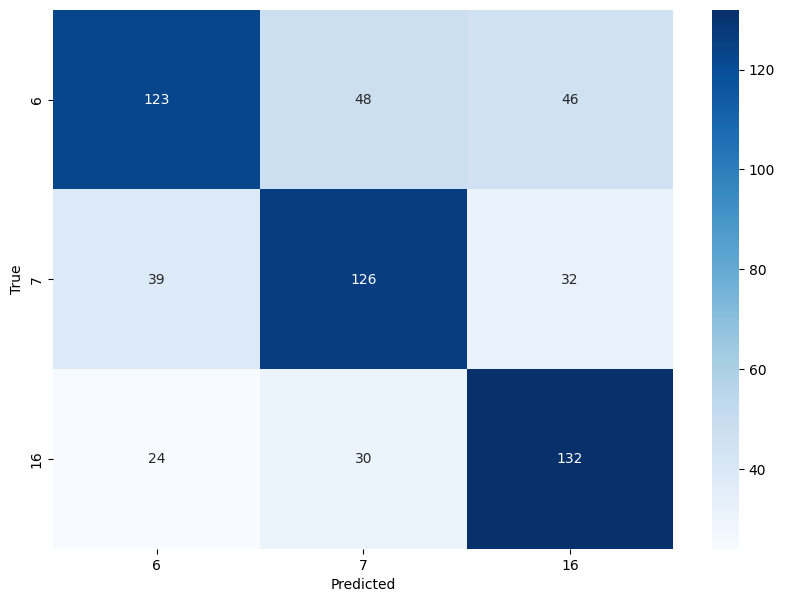

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred = rf_optimizado.predict(X_test)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[6, 7, 16], yticklabels=[6, 7, 16])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



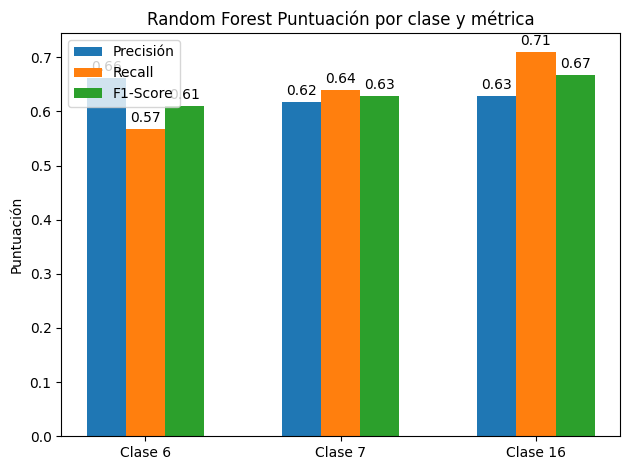

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

y_pred = rf_optimizado.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Extraer las métricas del reporte
precision = [report[str(i)]['precision'] for i in [6, 7, 16]]
recall = [report[str(i)]['recall'] for i in [6, 7, 16]]
f1_score = [report[str(i)]['f1-score'] for i in [6, 7, 16]]
labels = ['Clase 6', 'Clase 7', 'Clase 16']

# Crear el gráfico
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precisión')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Añadir etiquetas, título y leyenda
ax.set_ylabel('Puntuación')
ax.set_title('Random Forest Puntuación por clase y métrica')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Función para añadir etiquetas sobre las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()


## Naive Bayes:

Implementación: Luimarco Carrascal


busqueda de hiperparametros optimos

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, f1_score

# Definir el modelo
nb = GaussianNB()

# Definir la grilla de hiperparámetros
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Definir la métrica
f1_scorer = make_scorer(f1_score, average='weighted')

# Crear la búsqueda en grilla
grid_search_nb = GridSearchCV(nb, param_grid_nb, scoring=f1_scorer, cv=5, verbose=1, n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print(grid_search_nb.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 0.0008111308307896872}


Mejor hiperparametro:
{'var_smoothing': 6.579332246575683e-05}


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Crear el modelo con el hiperparámetro óptimo
nb_model_optimized = GaussianNB(var_smoothing=6.579332246575683e-05)

# Entrenar el modelo optimizado
nb_model_optimized.fit(X_train, y_train)

# Predecir las etiquetas de los datos de prueba
y_pred_nb_optimized = nb_model_optimized.predict(X_test)

# Evaluar el modelo optimizado
print("Reporte de clasificación para Naive Bayes Optimizado:\n", classification_report(y_test, y_pred_nb_optimized))


Reporte de clasificación para Naive Bayes Optimizado:
               precision    recall  f1-score   support

           6       0.62      0.47      0.54       217
           7       0.62      0.52      0.57       197
          16       0.54      0.78      0.64       186

    accuracy                           0.58       600
   macro avg       0.59      0.59      0.58       600
weighted avg       0.60      0.58      0.58       600



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Crear el modelo
nb_model = GaussianNB()

# Entrenar el modelo
nb_model.fit(X_train, y_train)

# Predecir las etiquetas de los datos de prueba
y_pred_nb = nb_model.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación para Naive Bayes:\n", classification_report(y_test, y_pred_nb))



Reporte de clasificación para Naive Bayes:
               precision    recall  f1-score   support

           6       0.62      0.47      0.54       217
           7       0.62      0.52      0.57       197
          16       0.54      0.78      0.64       186

    accuracy                           0.58       600
   macro avg       0.59      0.59      0.58       600
weighted avg       0.60      0.58      0.58       600



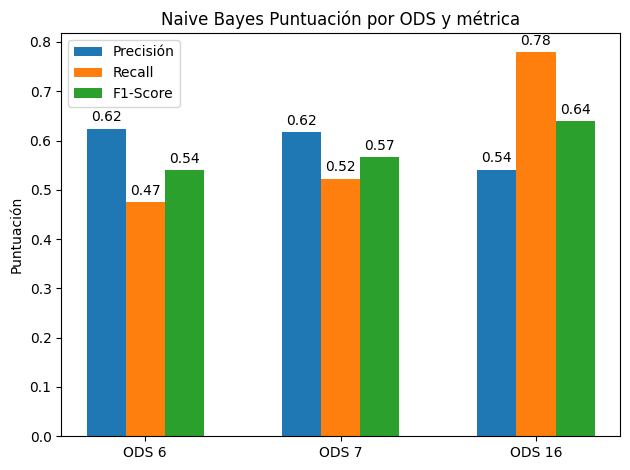

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

y_pred = nb_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Extraer las métricas del reporte
precision = [report[str(i)]['precision'] for i in [6, 7, 16]]
recall = [report[str(i)]['recall'] for i in [6, 7, 16]]
f1_score = [report[str(i)]['f1-score'] for i in [6, 7, 16]]
labels = ['ODS 6', 'ODS 7', 'ODS 16']

# Crear el gráfico
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precisión')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Añadir etiquetas, título y leyenda
ax.set_ylabel('Puntuación')
ax.set_title('Naive Bayes Puntuación por ODS y métrica')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Función para añadir etiquetas sobre las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

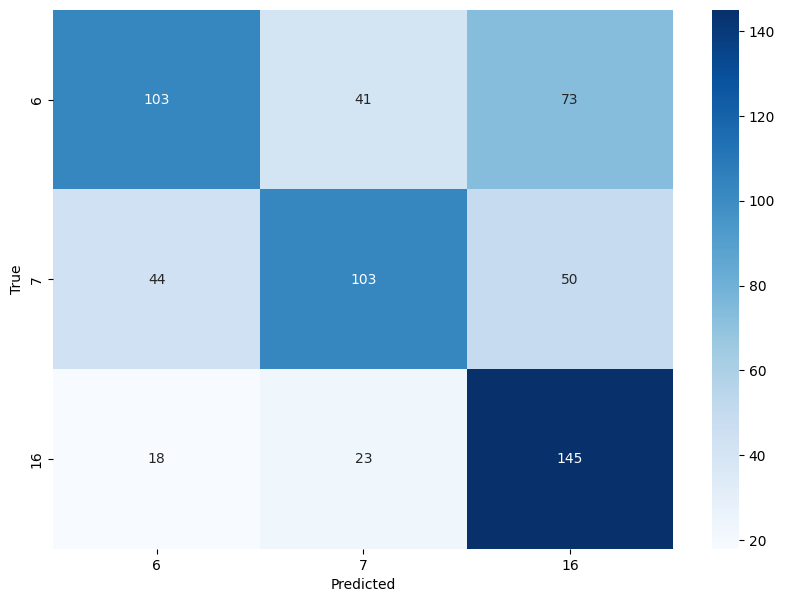

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred = nb_model.predict(X_test)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[6, 7, 16], yticklabels=[6, 7, 16])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# Crear el modelo
svm_model = SVC(kernel='linear', random_state=42)

# Entrenar el modelo
svm_model.fit(X2_train, y2_train)

# Predecir las etiquetas de los datos de prueba
y_pred_svm = svm_model.predict(X2_test)

# Evaluar el modelo
print("Reporte de clasificación para SVM:\n", classification_report(y2_test, y_pred_svm))


Reporte de clasificación para SVM:
               precision    recall  f1-score   support

           6       0.99      0.99      0.99       217
           7       0.97      0.98      0.98       197
          16       1.00      0.98      0.99       186

    accuracy                           0.98       600
   macro avg       0.99      0.98      0.99       600
weighted avg       0.99      0.98      0.99       600



  (0, 13038)	1
  (0, 21561)	1
  (0, 11038)	1
  (0, 8745)	1
  (0, 17664)	1
  (0, 12675)	1
  (0, 5157)	1
  (0, 5955)	1
  (0, 20834)	1
  (0, 9014)	1
  (0, 8108)	1
  (0, 9941)	1
  (0, 4404)	1
  (0, 9845)	1
  (0, 1572)	1
  (0, 19094)	1
  (0, 7455)	1
  (0, 9844)	1
  (0, 7917)	1
  (0, 4053)	1
  (0, 21134)	1
  (0, 16410)	1
  (0, 9742)	1
  (0, 8470)	1
  (0, 8749)	1
  (0, 9280)	1
  (0, 16530)	1
  (0, 10048)	1
  (0, 4405)	1
  (0, 12867)	1
  (0, 3431)	1
  (0, 14724)	1


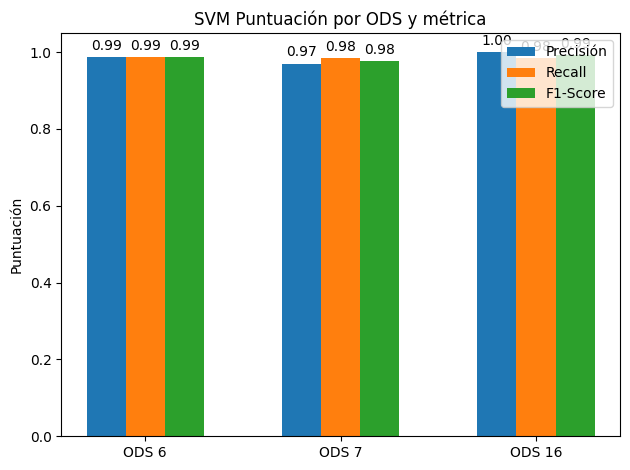

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

y_pred = svm_model.predict(X2_test)
print(X2_test[0])
report = classification_report(y2_test, y_pred, output_dict=True)

# Extraer las métricas del reporte
precision = [report[str(i)]['precision'] for i in [6, 7, 16]]
recall = [report[str(i)]['recall'] for i in [6, 7, 16]]
f1_score = [report[str(i)]['f1-score'] for i in [6, 7, 16]]
labels = ['ODS 6', 'ODS 7', 'ODS 16']

# Crear el gráfico
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precisión')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Añadir etiquetas, título y leyenda
ax.set_ylabel('Puntuación')
ax.set_title('SVM Puntuación por ODS y métrica')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Función para añadir etiquetas sobre las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

In [ ]:
svm_model.predict(X2_test[0])

array([7])

In [ ]:
from joblib import dump

# Guardar modelo en archivo
dump(svm_model, 'modelo_entrenado.pkl')

['modelo_entrenado.pkl']

In [ ]:
from google.colab import files

files.download('modelo_entrenado.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred = svm_model.predict(X2_test)

# Obtener la matriz de confusión
cm = confusion_matrix(y2_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[6, 7, 16], yticklabels=[6, 7, 16])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Predicción de los datos Sin etiquetar

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.semi_supervised import LabelSpreading

# Combina los dos dataframes
combined_df = pd.concat([textos_df, df_sinEtiquetaT], ignore_index=True)

# Convierte los textos a características numéricas (por ejemplo, utilizando TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(combined_df['Textos_espanol'])

# Prepara las etiquetas, usando -1 para los datos no etiquetados
y = combined_df['sdg'].replace(np.nan, -1).astype(int).values


In [ ]:
# Crea una instancia del modelo Label Spreading
label_spread = LabelSpreading(kernel='knn', alpha=0.2)

# Entrena el modelo
label_spread.fit(X.toarray(), y)

# Las etiquetas predichas estarán en label_spread.transduction_
y_pred = label_spread.transduction_


In [ ]:
# Extrae las etiquetas predichas para los datos no etiquetados
predicted_labels = y_pred[len(textos_df):]

# Añade las etiquetas predichas al dataframe df_sinEtiquetaT
df_sinEtiquetaT['sdg'] = predicted_labels


In [ ]:
df_sinEtiquetaT.shape

In [ ]:
df_sinEtiquetaT.head

In [ ]:
df_sinEtiqueta.head

In [ ]:
df_sinEtiqueta.shape

In [ ]:
df_sinEtiqueta['sdg'] = df_sinEtiquetaT['sdg'].values


Export del archivo de predicciones

In [ ]:
df_sinEtiqueta.to_csv('/content/drive/MyDrive/ProyectoBI/Data/SplitSemiEtiquetastest_cat_6716.csv', index=False, sep=';')
